# Analyzing data from the National Bouy System

## Background

The National Data Buoys Data center publish oceanographic data from their buoys on their web. Bouys send up their measurements every hour and the data is published as a spreadsheet in the NOAA web site.

We want to collect the data for any, or many, bouys, clean it up, and analyze it to make a plot.

## Challenges

- Get the data from the web and read it into our Python notebook.
- Clean up the data, which sometimes has missing measurements.
- Choose the bouys we want to analyze using their ID numbers.
- Run our analysis (we will just make a plot).
- Save our code as a script or module for reusing it later.

## References 

- National Data Buoy Center: http://www.ndbc.noaa.gov/
- Data for Station 44255 - NE Burgeo Bank: http://www.ndbc.noaa.gov/station_realtime.php?station=44255
- How a buoy get an ID: http://www.ndbc.noaa.gov/staid.shtml
- All the station IDs: http://www.ndbc.noaa.gov/to_station.shtml

In [96]:
#So convert into 
import StringIO #For converting into strings   #Moving earlier to allow for importing all buoys.txt

import pandas as pd #cf. Excel. Go-to for data processing #as pd is just giving shortcut

import requests #Library for getting stuff from web

import pylab  

import numpy as np
from numpy import nan

import matplotlib.pyplot as plt

In [82]:
# Retrieve data
# url = 'http://www.ndbc.noaa.gov/data/realtime2/44255.txt'
url = 'http://www.ndbc.noaa.gov/view_text_file.php?filename=44011h2012.txt.gz&dir=data/historical/stdmet/'
response = requests.get(url)

In [83]:
# type(response.text)

In [84]:
data_str = StringIO.StringIO(response.text)

In [85]:
data = pd.read_csv(StringIO.StringIO(response.text), 
                   delim_whitespace=True, 
                   skiprows=[1,2], 
                   usecols=[0,1,2,3,6,8])

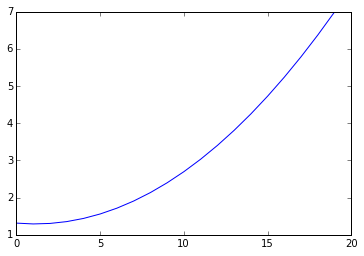

In [126]:
# import numpy as np
# from numpy import nan #moved to top
data=data.replace('MM', nan)
data=data.replace('99', nan)
data=data.dropna(axis=0)

z = np.polyfit(data.WSPD, data.WVHT, 2)
p = np.poly1d(z)
wspd=range(20)
pylab.plot(wspd,p(wspd))

# the line equation:
# print “y=%.6fx+(%.6f)”%(z[0],z[1])


# import scipy.signal
# detrended=scipy.signal.detrend(data.WSPD, data.WVHT)

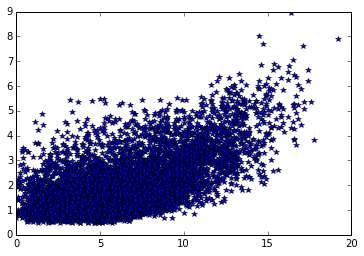

In [110]:
%matplotlib inline

plt.plot(data.WSPD, data.WVHT, '*')

# data.WSPD.plot()

In [88]:
print data.WSPD.mean()

14.4637681159


In [89]:
#nbviewer.com

In [90]:
import capstone_buoys #after saving to cd as .py